In [17]:
###########import packages##########
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import ensemble
from sklearn.tree import ExtraTreeRegressor
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
seed=5647 
###########import packages##########
import catboost
import xgboost
import lightgbm
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import *
import pickle
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  *

In [18]:
###########wrapping root mean square error for later calls##########
def compute_mae_mse_rmse(target,prediction):
    error = []
    for i in range(len(target)):
        error.append(target[i] - prediction[i])
    squaredError = []
    absError = []
    for val in error:
        squaredError.append(val * val)  # target-prediction之差平方
        absError.append(abs(val))  # 误差绝对值
    mae=sum(absError)/len(absError)  # 平均绝对误差MAE
    mse=sum(squaredError)/len(squaredError)  # 均方误差MSE
    RMSE=np.sqrt(sum(squaredError)/len(squaredError))
    R2=r2_score(target,prediction)
    return mae,mse,RMSE,R2
def gridsearch(model,param,algorithm_name,X_train,y_train,X_test,y_test):
    grid = GridSearchCV(model,param_grid=param,scoring='neg_mean_absolute_error',cv=10,n_jobs=-1,verbose=-1)
    grid.fit(X_train,y_train)
    best_model=grid.best_estimator_
    ####Train####
    prediction_train = best_model.predict(X_train)
    real_train=y_train.values
    prediction_train_series=pd.Series(prediction_train)
    real_train_series=pd.Series(real_train)
    corr_ann_train = round(prediction_train_series.corr(real_train_series), 5)
    error_val_train= compute_mae_mse_rmse(prediction_train,real_train)
    ####test####
    prediction_test = best_model.predict(X_test)
    real_test=y_test.values
    prediction_test_series=pd.Series(prediction_test)
    real_test_series=pd.Series(real_test)
    corr_ann_test = round(prediction_test_series.corr(real_test_series), 5)
    error_val_test= compute_mae_mse_rmse(prediction_test,real_test)
    print(algorithm_name)
    best_score=grid.best_score_
    print('Best Regressor:',grid.best_params_,'Best Score:', best_score)
    print(error_val_test)
    print('R2 TEST',error_val_test[3])
    fig=plt.figure()
    ax = fig.add_subplot(111)
    x_y_x=np.arange(100,1500,0.01)
    x_y_y=np.arange(100,1500,0.01)
    ax.scatter(prediction_train,real_train,c='blue',label='Train',alpha=0.25)
    ax.scatter(prediction_test,real_test,c='red',label='Test',alpha=0.75)
    ax.plot(x_y_x,x_y_y,c='black')
    plt.legend()
    plt.xlabel('Predicted_Overpotential@10 mA cm-2')
    plt.ylabel('Real_Overpotential@10 mA cm-2')
    return best_model,error_val_test[3]

In [19]:
fl = open(r'./database_full_ac_for_inter.pkl','rb')
database_full=pickle.load(fl)
data_input_full=database_full.iloc[:,0:54]
data_output_full=database_full.iloc[:,54]
X_train,X_test,y_train,y_test=train_test_split(data_input_full,data_output_full,test_size=0.1,random_state=seed)

In [20]:
data_input_full

,Metal_Dopant_1 Relative Atomic Mass,Metal_Dopant_1 Atomic Number,Metal_Dopant_1 Period,Metal_Dopant_1 Group,Metal_Dopant_1 Ionization Potential,Metal_Dopant_1 Electronegativity,Metal_Dopant_1 Number of d electrons,Metal_Dopant_1 Atomic Radius,Metal_Dopant_2 Relative Atomic Mass,Metal_Dopant_2 Atomic Number,...,Annealing Still/Strring (0/1),Annealing Atomosphere Inert (0/1),Annealing Atomosphere Reductive (0/1),Post-processing Acid Wash etc. (0/1),Catalyst Loading (mg cm -2),Support Material Loading (mg cm -2),Support is not Carbon (0/1),Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1),LSV Scanning Speed (mV s-1),Electrolyte Proton Concentration (M)
0,63.5460,29,4,11,7.69,1.90,10.0,128,101.0700,44,...,0,0,0,0,0.704000,0.000000,0,0,1.0,1.0
1,63.5460,29,4,11,7.69,1.90,10.0,128,101.0700,44,...,0,0,0,0,0.704000,0.000000,0,0,1.0,1.0
2,63.5460,29,4,11,7.69,1.90,10.0,128,101.0700,44,...,0,0,0,0,0.704000,0.000000,0,0,1.0,1.0
3,63.5460,29,4,11,7.69,1.90,10.0,128,101.0700,44,...,0,0,0,0,0.704000,0.000000,0,0,1.0,1.0
4,58.9330,27,4,9,7.81,1.88,7.0,125,0.0000,0,...,0,0,0,0,0.902000,0.198000,0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,192.2170,77,6,9,9.10,2.20,7.0,136,183.8400,74,...,0,0,0,0,0.300000,0.000000,0,1,5.0,1.0
1843,22.9897,11,3,1,5.12,0.93,0.0,190,58.9330,27,...,0,0,0,0,0.174000,0.000000,0,0,5.0,1.0
1844,22.9897,11,3,1,5.12,0.93,0.0,190,58.9330,27,...,0,0,0,0,0.187000,0.000000,0,0,5.0,1.0
1845,101.0700,44,5,8,7.50,2.20,7.0,134,58.6934,28,...,0,0,0,1,0.306045,0.085586,0,0,5.0,0.1


D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\ensemble\_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: F

D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: 

D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: 

D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: 

D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: 

D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: 

D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: 

D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: 

D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\tree\_classes.py:363: 

GradientBoost
Best Regressor: {'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 400} Best Score: -39.40779959369727
(29.756805200033657, 1735.9918794104908, 41.665235861692786, 0.8389356585276455)
R2 TEST 0.8389356585276455


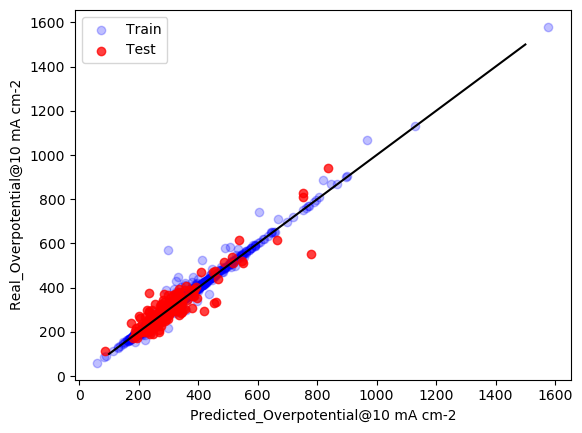

In [8]:
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(random_state=1)
###########defining the parameters dictionary##########
param_GB = {
# 'learning_rate':[0.001,0.002,0.004,0.005,0.006,0.008,0.01,0.02,0.04,0.06,0.05,0.06,0.08,0.1,0.12,0.14,0.15,0.16,0.18,0.2,0.4,0.5,0.6,0.8,1],
# 'n_estimators':[50,100,200,400],
# 'max_depth':[3,5,7,9,11,13,16],
# 'criterion':['friedman_mse','mae','mse'],
# 'max_features':['auto','sqrt','log2'],
# 'loss':['ls', 'lad', 'huber', 'quantile']
    'criterion': ['mse'], 'learning_rate': [0.1], 'loss': ['huber'], 'max_depth': [7], 'max_features': ['sqrt'], 'n_estimators': [400]
}
GB_full,GB_full_score=gridsearch(model_GradientBoostingRegressor,param_GB,'GradientBoost',X_train,y_train,X_test,y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

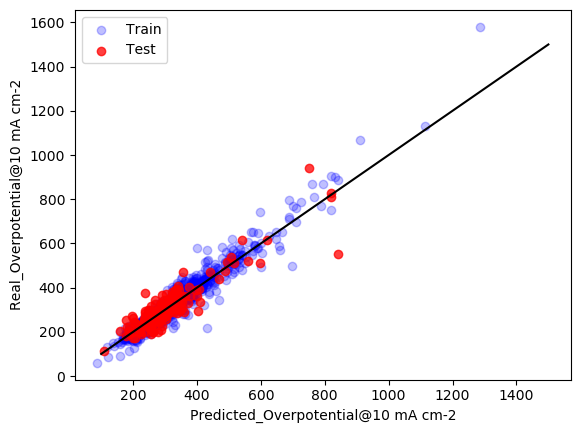

In [9]:
model_LGBMRegressor=LGBMRegressor(random_state=1,verbose=0)
param_lgbm = {
# 'boosting_type':['gbdt','rf'],
# 'learning_rate':[0.001,0.002,0.004,0.005,0.006,0.008,0.01,0.02,0.04,0.06,0.05,0.06,0.08,0.1,0.12,0.14,0.15,0.16,0.18,0.2,0.4,0.5,0.6,0.8,1],
# 'subsample':[0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
# 'n_estimators':[50,100,200,400],
# 'max_depth':[5,7,9,11,13,-1],
# 'reg_alpha':[0,0.001,0.01,0.0001,0.00001],
# 'reg_lambda':[0,0.001,0.01,0.0001,0.00001]
'boosting_type': ['gbdt'], 'learning_rate': [0.08], 'max_depth': [7], 'n_estimators': [400], 'reg_alpha': [0.01], 'reg_lambda': [0.0001], 'subsample': [0.4]
}
LGBM_full,LGBM_full_score=gridsearch(model_LGBMRegressor,param_lgbm,'LightGBM',X_train,y_train,X_test,y_test)

D:\Anaconda\envs\pdpbox\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Random Forest
Best Regressor: {'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 400} Best Score: -40.51349114201675
(30.263351210951207, 1632.689395763198, 40.40655139656437, 0.8098161180556286)
R2 TEST 0.8098161180556286


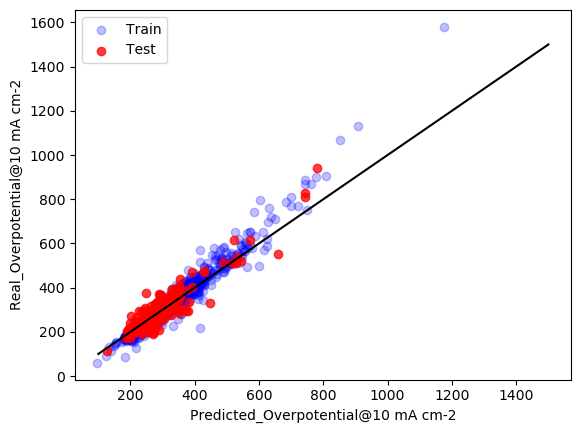

In [10]:
###########RandomForest gridsearch CV for best hyperparameter##########
model_RandomForestRegressor = ensemble.RandomForestRegressor(random_state=1)
###########defining the parameters dictionary##########
param_RF = {
# 'n_estimators':[50,100,200,400,None],
# 'max_depth':[3,5,7,9,11,None],
# 'criterion':['mse','mae'],
# 'max_features':['auto','sqrt','log2']
'criterion': ['mse'], 'max_depth':[ None], 'max_features': ['sqrt'], 'n_estimators': [400]
}
RF_full,RF_full_score=gridsearch(model_RandomForestRegressor,param_RF,'Random Forest',X_train,y_train,X_test,y_test)

In [7]:
import math
from pdpbox.pdp_calc_utils import _calc_ice_lines_inter
from pdpbox.pdp import pdp_isolate, PDPInteract
from pdpbox.utils import (_check_model, _check_dataset, _check_percentile_range, _check_feature,
                    _check_grid_type, _check_memory_limit, _make_list,
                    _calc_memory_usage, _get_grids, _get_grid_combos, _check_classes)
from joblib import Parallel, delayed

def pdp_multi_interact(model, dataset, model_features, features, 
                    num_grid_points=None, grid_types=None, percentile_ranges=None, grid_ranges=None, cust_grid_points=None, 
                    cust_grid_combos=None, use_custom_grid_combos=False,
                    memory_limit=0.9, n_jobs=8, predict_kwds=None, data_transformer=None):

    def _expand_default(x, default, length):
        if x is None:
            return [default] * length
        return x

    def _get_grid_combos(feature_grids, feature_types):
        grids = [np.array(list(feature_grid),dtype=np.float16) for feature_grid in feature_grids]
        for i in range(len(feature_types)):
            if feature_types[i] == 'onehot':
                grids[i] = np.eye(len(grids[i])).astype(int).tolist()
        return np.stack(np.meshgrid(*grids,copy=bool), -1).reshape(-1, len(grids))

    if predict_kwds is None:
        predict_kwds = dict()

    nr_feats = len(features)

    # check function inputs
    n_classes, predict = _check_model(model=model)
    _check_dataset(df=dataset)
    _dataset = dataset.copy()

    # prepare the grid
    pdp_isolate_outs = []
    if use_custom_grid_combos:
        grid_combos = cust_grid_combos
        feature_grids = []
        feature_types = []
    else:
        num_grid_points = _expand_default(x=num_grid_points, default=10, length=nr_feats)
        grid_types = _expand_default(x=grid_types, default='percentile', length=nr_feats)
        for i in range(nr_feats):
            _check_grid_type(grid_type=grid_types[i])

        percentile_ranges = _expand_default(x=percentile_ranges, default=None, length=nr_feats)
        for i in range(nr_feats):
            _check_percentile_range(percentile_range=percentile_ranges[i])

        grid_ranges = _expand_default(x=grid_ranges, default=None, length=nr_feats)
        cust_grid_points = _expand_default(x=cust_grid_points, default=None, length=nr_feats)

        _check_memory_limit(memory_limit=memory_limit)

        pdp_isolate_outs = []
        for idx in range(nr_feats):
            pdp_isolate_out = pdp_isolate(
                model=model, dataset=_dataset, model_features=model_features, feature=features[idx],
                num_grid_points=num_grid_points[idx], grid_type=grid_types[idx], percentile_range=percentile_ranges[idx],
                grid_range=grid_ranges[idx], cust_grid_points=cust_grid_points[idx], memory_limit=memory_limit,
                n_jobs=n_jobs, predict_kwds=predict_kwds, data_transformer=data_transformer)
            pdp_isolate_outs.append(pdp_isolate_out)

        if n_classes > 2:
            feature_grids = [pdp_isolate_outs[i][0].feature_grids for i in range(nr_feats)]
            feature_types = [pdp_isolate_outs[i][0].feature_type  for i in range(nr_feats)]
        else:
            feature_grids = [pdp_isolate_outs[i].feature_grids for i in range(nr_feats)]
            feature_types = [pdp_isolate_outs[i].feature_type  for i in range(nr_feats)]

        grid_combos = _get_grid_combos(feature_grids, feature_types)

    feature_list = []
    for i in range(nr_feats):
        feature_list.extend(_make_list(features[i]))

    # Parallel calculate ICE lines
    true_n_jobs = _calc_memory_usage(
        df=_dataset, total_units=len(grid_combos), n_jobs=n_jobs, memory_limit=memory_limit)

    grid_results = Parallel(n_jobs=true_n_jobs)(delayed(_calc_ice_lines_inter)(
        grid_combo, data=_dataset, model=model, model_features=model_features, n_classes=n_classes,
        feature_list=feature_list, predict_kwds=predict_kwds, data_transformer=data_transformer)
                                                for grid_combo in grid_combos)

    ice_lines = pd.concat(grid_results, axis=0).reset_index(drop=True)
    pdp = ice_lines.groupby(feature_list, as_index=False).mean()

    # combine the final results
    pdp_interact_params = {'n_classes': n_classes, 
                        'features': features, 
                        'feature_types': feature_types,
                        'feature_grids': feature_grids}
    if n_classes > 2:
        pdp_interact_out = []
        for n_class in range(n_classes):
            _pdp = pdp[feature_list + ['class_%d_preds' % n_class]].rename(
                columns={'class_%d_preds' % n_class: 'preds'})
            pdp_interact_out.append(
                PDPInteract(which_class=n_class,
                            pdp_isolate_outs=[pdp_isolate_outs[i][n_class] for i in range(nr_feats)],
                            pdp=_pdp, **pdp_interact_params))
    else:
        pdp_interact_out = PDPInteract(
            which_class=None, pdp_isolate_outs=pdp_isolate_outs, pdp=pdp, **pdp_interact_params)

    return pdp_interact_out
print('ready')

ready


In [8]:
def center(arr): return arr - np.mean(arr)
import itertools
def compute_f_vals(mdl, X, features, selectedfeatures, num_grid_points=10, use_data_grid=False):
    f_vals = {}
    data_grid = None
    if use_data_grid:
        data_grid = X[selectedfeatures].values
    # Calculate partial dependencies for full feature set
    p_full = pdp_multi_interact(mdl, X, features, selectedfeatures, 
                                num_grid_points=[num_grid_points] * len(selectedfeatures),
                                cust_grid_combos=data_grid,
                                use_custom_grid_combos=use_data_grid)
    f_vals[tuple(selectedfeatures)] = center(p_full.pdp.preds.values)
    grid = p_full.pdp.drop('preds', axis=1)
    # Calculate partial dependencies for [1..SFL-1]
    for n in range(1, len(selectedfeatures)):
        for subsetfeatures in itertools.combinations(selectedfeatures, n):
            if use_data_grid:
                data_grid = X[list(subsetfeatures)].values
            p_partial = pdp_multi_interact(mdl, X, features, subsetfeatures, 
                                        num_grid_points=[num_grid_points] * len(selectedfeatures),
                                        cust_grid_combos=data_grid,
                                        use_custom_grid_combos=use_data_grid)
            p_joined = pd.merge(grid, p_partial.pdp, how='left')
            f_vals[tuple(subsetfeatures)] = center(p_joined.preds.values)
    return f_vals
def compute_h_val(f_vals, selectedfeatures):
    denom_els = f_vals[tuple(selectedfeatures)].copy()
    numer_els = f_vals[tuple(selectedfeatures)].copy()
    sign = -1.0
    for n in range(len(selectedfeatures)-1, 0, -1):
        for subfeatures in itertools.combinations(selectedfeatures, n):
            print(tuple(subfeatures))
            numer_els += sign * f_vals[tuple(subfeatures)]
        sign *= -1.0
    numer = np.sum(numer_els**2)
    denom = np.sum(denom_els**2)
    return math.sqrt(numer/denom) if numer < denom else np.nan
def compute_h_val_any(f_vals, allfeatures, selectedfeature):
    otherfeatures = list(allfeatures)
    otherfeatures.remove(selectedfeature)
    denom_els = f_vals[tuple(allfeatures)].copy()
    numer_els = denom_els.copy()
    numer_els -= f_vals[(selectedfeature,)]
    numer_els -= f_vals[tuple(otherfeatures)]
    numer = np.sum(numer_els**2)
    denom = np.sum(denom_els**2)
    return math.sqrt(numer/denom) if numer < denom else np.nan
def compute_interactions(model,X_train,feature_all,feature_select_list):  
    result_dict={}
    for i in range(len(feature_select_list)):
        for j in range(len(feature_select_list)):
            if i<j :
                print(i,j)
                try:
                    current_features=[feature_select_list[i],feature_select_list[j]]
                    f_vals=compute_f_vals(model, X_train, feature_all,current_features) 
                    result_dict[tuple(current_features)]=compute_h_val(f_vals,current_features)
                except:
                    result_dict[tuple(current_features)]=0
                print(result_dict[tuple(current_features)])
    return result_dict

In [13]:
GB_DICT=compute_interactions(GB_full,data_input_full,data_input_full.columns,list(data_input_full.columns))

0 1
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Atomic Number',)
0.07160260535693794
0 2
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Period',)
0.05117477310572663
0 3
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Group',)
0.13098766455957464
0 4
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Ionization Potential',)
0.21999475569739135
0 5
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Electronegativity',)
0.08113688390295501
0 6
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Number of d electrons',)
0.14245819332764642
0 7
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Atomic Radius',)
0.1949155466677861
0 8
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_2 Relative Atomic Mass',)
0.11778546466669482
0 9
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_2 Atomic Number',)
0.0791462913020793
0 10
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_2 Period',)
0.1521207938990795
0 11
('M

('Metal_Dopant_1 Atomic Number',)
('Metal_Dopant_1 Proportion in Precursor ',)
0.22514737797636764
1 33
('Metal_Dopant_1 Atomic Number',)
('Metal_Dopant_2 Proportion in Precursor ',)
0.11187447110792041
1 34
('Metal_Dopant_1 Atomic Number',)
('Metal_Dopant_3 Proportion in Precursor ',)
0.09258778699379179
1 35
('Metal_Dopant_1 Atomic Number',)
('Metal_Dopant_4 Proportion in Precursor ',)
0.002488291472804374
1 36
('Metal_Dopant_1 Atomic Number',)
('Hydrothermal Temperature (Celcius degree)',)
0.12267998606666104
1 37
0
1 38
('Metal_Dopant_1 Atomic Number',)
('Hydrothermal Still/Strring (0/1)',)
0.04974593195726619
1 39
('Metal_Dopant_1 Atomic Number',)
('Hydrothermal Strong Reductant in Liquid (0/1)',)
0.017066146584252467
1 40
('Metal_Dopant_1 Atomic Number',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
0.06038516183358597
1 41
('Metal_Dopant_1 Atomic Number',)
('Mixed in Solid or Liquid (0/1)',)
0.094946597095849
1 42
('Metal_Dopant_1 Atomic Number',)
('Annealing Temperature (Ce

('Metal_Dopant_1 Group',)
('Metal_Dopant_3 Atomic Radius',)
0.031645955703336684
3 24
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Relative Atomic Mass',)
0.3198006665611906
3 25
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Atomic Number',)
0.018384113961361803
3 26
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Period',)
0.005512948053812104
3 27
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Group',)
0.0019024202675005535
3 28
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Ionization Potential',)
0.0011670042537488242
3 29
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Electronegativity',)
0.0007499248245123755
3 30
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Number of d electrons',)
0.044480714658880864
3 31
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Atomic Radius',)
0.023709818217136868
3 32
('Metal_Dopant_1 Group',)
('Metal_Dopant_1 Proportion in Precursor ',)
0.17843269249251076
3 33
('Metal_Dopant_1 Group',)
('Metal_Dopant_2 Proportion in Precursor ',)
0.2603684988063207
3 34
('Metal_Dopant_1 Group'

('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_2 Group',)
0.2137093701617761
5 12
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_2 Ionization Potential',)
0.1606207277135147
5 13
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_2 Electronegativity',)
0.09284446269351969
5 14
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_2 Number of d electrons',)
0.09786553940338695
5 15
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_2 Atomic Radius',)
0.1986962887492807
5 16
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Relative Atomic Mass',)
0.032729602959129696
5 17
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Atomic Number',)
0.06500229775757872
5 18
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Period',)
0.054922429907132524
5 19
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Group',)
0.011940496743013722
5 20
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Ionization Potential',)
0.21467316039645265
5 21
('Metal_Dopant_1 Ele

('Metal_Dopant_1 Number of d electrons',)
('Annealing Atomosphere Reductive (0/1)',)
0.024204841712485065
6 47
('Metal_Dopant_1 Number of d electrons',)
('Post-processing Acid Wash etc. (0/1)',)
0.022068374664527952
6 48
('Metal_Dopant_1 Number of d electrons',)
('Catalyst Loading (mg cm -2)',)
0.1667637447160304
6 49
('Metal_Dopant_1 Number of d electrons',)
('Support Material Loading (mg cm -2)',)
0.16056117469631032
6 50
('Metal_Dopant_1 Number of d electrons',)
('Support is not Carbon (0/1)',)
0.030520364794767763
6 51
('Metal_Dopant_1 Number of d electrons',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.05054639196974764
6 52
('Metal_Dopant_1 Number of d electrons',)
('LSV Scanning Speed (mV s-1)',)
0.22205347373877876
6 53
('Metal_Dopant_1 Number of d electrons',)
('Electrolyte Proton Concentration (M)',)
0.1189132241865413
7 8
('Metal_Dopant_1 Atomic Radius',)
('Metal_Dopant_2 Relative Atomic Mass',)
0.31111532585657287
7 9
('Metal_Dopant_1 Atomic Radius',)


('Metal_Dopant_2 Relative Atomic Mass',)
('Hydrothermal Strong Reductant in Liquid (0/1)',)
0.11987337911706471
8 40
('Metal_Dopant_2 Relative Atomic Mass',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
0.038905564801819795
8 41
('Metal_Dopant_2 Relative Atomic Mass',)
('Mixed in Solid or Liquid (0/1)',)
0.14940452205750446
8 42
('Metal_Dopant_2 Relative Atomic Mass',)
('Annealing Temperature (Celcius Degree)',)
0.06452117026156125
8 43
('Metal_Dopant_2 Relative Atomic Mass',)
('Annealing Time (min)',)
0.1320300659413505
8 44
('Metal_Dopant_2 Relative Atomic Mass',)
('Annealing Still/Strring (0/1)',)
0.015705001668607048
8 45
('Metal_Dopant_2 Relative Atomic Mass',)
('Annealing Atomosphere Inert (0/1)',)
0.11141634167570406
8 46
('Metal_Dopant_2 Relative Atomic Mass',)
('Annealing Atomosphere Reductive (0/1)',)
0.053594452617105805
8 47
('Metal_Dopant_2 Relative Atomic Mass',)
('Post-processing Acid Wash etc. (0/1)',)
0.08948722737845298
8 48
('Metal_Dopant_2 Relative Atomic Mass',

('Metal_Dopant_2 Period',)
('Hydrothermal Strong Reductant in Liquid (0/1)',)
0.033217818766448214
10 40
('Metal_Dopant_2 Period',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
0.025842924011095305
10 41
('Metal_Dopant_2 Period',)
('Mixed in Solid or Liquid (0/1)',)
0.13614593411708534
10 42
('Metal_Dopant_2 Period',)
('Annealing Temperature (Celcius Degree)',)
0.05052493370180409
10 43
('Metal_Dopant_2 Period',)
('Annealing Time (min)',)
0.026310971280601912
10 44
('Metal_Dopant_2 Period',)
('Annealing Still/Strring (0/1)',)
0.0066929190082573265
10 45
('Metal_Dopant_2 Period',)
('Annealing Atomosphere Inert (0/1)',)
0.16037033793745104
10 46
('Metal_Dopant_2 Period',)
('Annealing Atomosphere Reductive (0/1)',)
0.05307524820586661
10 47
('Metal_Dopant_2 Period',)
('Post-processing Acid Wash etc. (0/1)',)
0.05704961833333587
10 48
('Metal_Dopant_2 Period',)
('Catalyst Loading (mg cm -2)',)
0.0637287745892588
10 49
('Metal_Dopant_2 Period',)
('Support Material Loading (mg cm -2)',)


('Metal_Dopant_2 Ionization Potential',)
('Annealing Time (min)',)
0.05796241143211125
12 44
('Metal_Dopant_2 Ionization Potential',)
('Annealing Still/Strring (0/1)',)
0.005443958338847051
12 45
('Metal_Dopant_2 Ionization Potential',)
('Annealing Atomosphere Inert (0/1)',)
0.05277991885694378
12 46
('Metal_Dopant_2 Ionization Potential',)
('Annealing Atomosphere Reductive (0/1)',)
0.10352527834646091
12 47
('Metal_Dopant_2 Ionization Potential',)
('Post-processing Acid Wash etc. (0/1)',)
0.18584465380319418
12 48
('Metal_Dopant_2 Ionization Potential',)
('Catalyst Loading (mg cm -2)',)
0.18518053421246986
12 49
('Metal_Dopant_2 Ionization Potential',)
('Support Material Loading (mg cm -2)',)
0.12220756511751708
12 50
('Metal_Dopant_2 Ionization Potential',)
('Support is not Carbon (0/1)',)
0.00921556086407091
12 51
('Metal_Dopant_2 Ionization Potential',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.1612226022930563
12 52
('Metal_Dopant_2 Ionization Potential',)


('Metal_Dopant_2 Number of d electrons',)
('Annealing Still/Strring (0/1)',)
0.011362991329488243
14 45
('Metal_Dopant_2 Number of d electrons',)
('Annealing Atomosphere Inert (0/1)',)
0.2054085970503271
14 46
('Metal_Dopant_2 Number of d electrons',)
('Annealing Atomosphere Reductive (0/1)',)
0.02737417834884952
14 47
('Metal_Dopant_2 Number of d electrons',)
('Post-processing Acid Wash etc. (0/1)',)
0.015448086466102498
14 48
('Metal_Dopant_2 Number of d electrons',)
('Catalyst Loading (mg cm -2)',)
0.07109878219641559
14 49
('Metal_Dopant_2 Number of d electrons',)
('Support Material Loading (mg cm -2)',)
0.05356387891808327
14 50
('Metal_Dopant_2 Number of d electrons',)
('Support is not Carbon (0/1)',)
0.012637268099642277
14 51
('Metal_Dopant_2 Number of d electrons',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.18567751500179777
14 52
('Metal_Dopant_2 Number of d electrons',)
('LSV Scanning Speed (mV s-1)',)
0.06509622877088488
14 53
('Metal_Dopant_2 Number

('Metal_Dopant_3 Relative Atomic Mass',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.14702040467184607
16 52
('Metal_Dopant_3 Relative Atomic Mass',)
('LSV Scanning Speed (mV s-1)',)
0.16805906925397968
16 53
('Metal_Dopant_3 Relative Atomic Mass',)
('Electrolyte Proton Concentration (M)',)
0.018009994470259815
17 18
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Period',)
0.0497256284271279
17 19
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Group',)
0.1398184013666128
17 20
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Ionization Potential',)
0.02578394673156123
17 21
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Electronegativity',)
0.029009406829625425
17 22
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Number of d electrons',)
0.05055273566577976
17 23
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Atomic Radius',)
0.05871411619246335
17 24
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_4 Relative Atomic Mass',)
0.000656425232647

('Metal_Dopant_3 Group',)
('Metal_Dopant_3 Proportion in Precursor ',)
0.21036413762403247
19 35
('Metal_Dopant_3 Group',)
('Metal_Dopant_4 Proportion in Precursor ',)
0.0068076289686848515
19 36
('Metal_Dopant_3 Group',)
('Hydrothermal Temperature (Celcius degree)',)
0.09437381903813316
19 37
0
19 38
('Metal_Dopant_3 Group',)
('Hydrothermal Still/Strring (0/1)',)
0.01839101059545699
19 39
('Metal_Dopant_3 Group',)
('Hydrothermal Strong Reductant in Liquid (0/1)',)
0.002580713064739998
19 40
('Metal_Dopant_3 Group',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
0.1822827107291547
19 41
('Metal_Dopant_3 Group',)
('Mixed in Solid or Liquid (0/1)',)
0.13080728264966457
19 42
('Metal_Dopant_3 Group',)
('Annealing Temperature (Celcius Degree)',)
0.07818573741647099
19 43
('Metal_Dopant_3 Group',)
('Annealing Time (min)',)
0.02573694976388316
19 44
('Metal_Dopant_3 Group',)
('Annealing Still/Strring (0/1)',)
0.025333580880156584
19 45
('Metal_Dopant_3 Group',)
('Annealing Atomosphere Ine

('Metal_Dopant_3 Electronegativity',)
('LSV Scanning Speed (mV s-1)',)
0.06527342825326816
21 53
('Metal_Dopant_3 Electronegativity',)
('Electrolyte Proton Concentration (M)',)
0.06760989244271046
22 23
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_3 Atomic Radius',)
0.06762385859876249
22 24
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Relative Atomic Mass',)
0.001516937244406503
22 25
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Atomic Number',)
0.0003032258366564629
22 26
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Period',)
0.3998504075620649
22 27
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Group',)
1.3954377671732612e-14
22 28
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Ionization Potential',)
0.014741272821768868
22 29
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Electronegativity',)
0.2063263522738096
22 30
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Number of d elec

('Metal_Dopant_4 Relative Atomic Mass',)
('Annealing Time (min)',)
0.00019207862912527573
24 44
('Metal_Dopant_4 Relative Atomic Mass',)
('Annealing Still/Strring (0/1)',)
2.799657659772362e-15
24 45
('Metal_Dopant_4 Relative Atomic Mass',)
('Annealing Atomosphere Inert (0/1)',)
0.0004467778416654047
24 46
('Metal_Dopant_4 Relative Atomic Mass',)
('Annealing Atomosphere Reductive (0/1)',)
0.009853528375963112
24 47
('Metal_Dopant_4 Relative Atomic Mass',)
('Post-processing Acid Wash etc. (0/1)',)
0.0026525519981168088
24 48
('Metal_Dopant_4 Relative Atomic Mass',)
('Catalyst Loading (mg cm -2)',)
0.07599140437623637
24 49
('Metal_Dopant_4 Relative Atomic Mass',)
('Support Material Loading (mg cm -2)',)
0.017822044445687222
24 50
('Metal_Dopant_4 Relative Atomic Mass',)
('Support is not Carbon (0/1)',)
0.0015006840579075567
24 51
('Metal_Dopant_4 Relative Atomic Mass',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.009346417930880119
24 52
('Metal_Dopant_4 Relative A

('Metal_Dopant_4 Group',)
('Catalyst Loading (mg cm -2)',)
0.020729410083026006
27 49
('Metal_Dopant_4 Group',)
('Support Material Loading (mg cm -2)',)
0.3994872996648113
27 50
('Metal_Dopant_4 Group',)
('Support is not Carbon (0/1)',)
7.52736482867861e-15
27 51
('Metal_Dopant_4 Group',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.0014823929311678589
27 52
('Metal_Dopant_4 Group',)
('LSV Scanning Speed (mV s-1)',)
0.12129824083585446
27 53
('Metal_Dopant_4 Group',)
('Electrolyte Proton Concentration (M)',)
0.00029437239896451105
28 29
('Metal_Dopant_4 Ionization Potential',)
('Metal_Dopant_4 Electronegativity',)
1.2262791028051987e-14
28 30
('Metal_Dopant_4 Ionization Potential',)
('Metal_Dopant_4 Number of d electrons',)
1.0313471662076448e-14
28 31
('Metal_Dopant_4 Ionization Potential',)
('Metal_Dopant_4 Atomic Radius',)
9.806686096370192e-15
28 32
('Metal_Dopant_4 Ionization Potential',)
('Metal_Dopant_1 Proportion in Precursor ',)
0.040898147219604566
28 33


('Metal_Dopant_4 Atomic Radius',)
('Metal_Dopant_3 Proportion in Precursor ',)
0.02278798437251876
31 35
('Metal_Dopant_4 Atomic Radius',)
('Metal_Dopant_4 Proportion in Precursor ',)
0.000137560194819495
31 36
('Metal_Dopant_4 Atomic Radius',)
('Hydrothermal Temperature (Celcius degree)',)
0.03591762817733535
31 37
0
31 38
('Metal_Dopant_4 Atomic Radius',)
('Hydrothermal Still/Strring (0/1)',)
0.002274249584699784
31 39
('Metal_Dopant_4 Atomic Radius',)
('Hydrothermal Strong Reductant in Liquid (0/1)',)
0.0037934016968887195
31 40
('Metal_Dopant_4 Atomic Radius',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
8.086922006288009e-15
31 41
('Metal_Dopant_4 Atomic Radius',)
('Mixed in Solid or Liquid (0/1)',)
0.0002605269277372368
31 42
('Metal_Dopant_4 Atomic Radius',)
('Annealing Temperature (Celcius Degree)',)
0.007102647865040997
31 43
('Metal_Dopant_4 Atomic Radius',)
('Annealing Time (min)',)
0.040958496289143234
31 44
('Metal_Dopant_4 Atomic Radius',)
('Annealing Still/Strring (

('Metal_Dopant_3 Proportion in Precursor ',)
('Electrolyte Proton Concentration (M)',)
0.034765583335367375
35 36
('Metal_Dopant_4 Proportion in Precursor ',)
('Hydrothermal Temperature (Celcius degree)',)
0.04899383712924304
35 37
0
35 38
('Metal_Dopant_4 Proportion in Precursor ',)
('Hydrothermal Still/Strring (0/1)',)
0.0008835321079912413
35 39
('Metal_Dopant_4 Proportion in Precursor ',)
('Hydrothermal Strong Reductant in Liquid (0/1)',)
0.017458411667931252
35 40
('Metal_Dopant_4 Proportion in Precursor ',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
7.361106157871429e-14
35 41
('Metal_Dopant_4 Proportion in Precursor ',)
('Mixed in Solid or Liquid (0/1)',)
0.030854465939237827
35 42
('Metal_Dopant_4 Proportion in Precursor ',)
('Annealing Temperature (Celcius Degree)',)
0.0100240354250965
35 43
('Metal_Dopant_4 Proportion in Precursor ',)
('Annealing Time (min)',)
0.012820562321530662
35 44
('Metal_Dopant_4 Proportion in Precursor ',)
('Annealing Still/Strring (0/1)',)
6.25

('Hydrothermal Weak Reductant in Liquid (0/1)',)
('Support is not Carbon (0/1)',)
0.099567935880936
40 51
('Hydrothermal Weak Reductant in Liquid (0/1)',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.04895037951617601
40 52
('Hydrothermal Weak Reductant in Liquid (0/1)',)
('LSV Scanning Speed (mV s-1)',)
0.3220103308341898
40 53
('Hydrothermal Weak Reductant in Liquid (0/1)',)
('Electrolyte Proton Concentration (M)',)
0.04299400722998305
41 42
('Mixed in Solid or Liquid (0/1)',)
('Annealing Temperature (Celcius Degree)',)
0.10428426850355711
41 43
('Mixed in Solid or Liquid (0/1)',)
('Annealing Time (min)',)
0.046492142708796626
41 44
('Mixed in Solid or Liquid (0/1)',)
('Annealing Still/Strring (0/1)',)
0.0006860011174447145
41 45
('Mixed in Solid or Liquid (0/1)',)
('Annealing Atomosphere Inert (0/1)',)
0.026742720033526693
41 46
('Mixed in Solid or Liquid (0/1)',)
('Annealing Atomosphere Reductive (0/1)',)
0.062282954724527766
41 47
('Mixed in Solid or Liquid (0

('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
('LSV Scanning Speed (mV s-1)',)
0.11955568862412318
51 53
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
('Electrolyte Proton Concentration (M)',)
0.024838735908801108
52 53
('LSV Scanning Speed (mV s-1)',)
('Electrolyte Proton Concentration (M)',)
0.14061722786419958


In [9]:
LGBM_DICT=compute_interactions(LGBM_full,data_input_full,data_input_full.columns,list(data_input_full.columns))

0 1
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Atomic Number',)
0.0036593371743401707
0 2
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Period',)
0.0
0 3
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Group',)
0.1055947124444827
0 4
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Ionization Potential',)
0.03340180958673641
0 5
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Electronegativity',)
0.04575340489496541
0 6
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Number of d electrons',)
0.04194117611723597
0 7
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Atomic Radius',)
0.07387139252736
0 8
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_2 Relative Atomic Mass',)
0.05046508953957889
0 9
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_2 Atomic Number',)
0.02064322454313554
0 10
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_2 Period',)
3.781377222130355e-15
0 11
('Metal_Dopant_1

('Metal_Dopant_1 Atomic Number',)
('Metal_Dopant_3 Proportion in Precursor ',)
0.035415159121303906
1 35
('Metal_Dopant_1 Atomic Number',)
('Metal_Dopant_4 Proportion in Precursor ',)
0.0
1 36
('Metal_Dopant_1 Atomic Number',)
('Hydrothermal Temperature (Celcius degree)',)
0.17263216244462368
1 37
('Metal_Dopant_1 Atomic Number',)
('Hydrothermal Time (min)',)
0.07535836666494138
1 38
('Metal_Dopant_1 Atomic Number',)
('Hydrothermal Still/Strring (0/1)',)
0.05312782154276152
1 39
('Metal_Dopant_1 Atomic Number',)
('Hydrothermal Strong Reductant in Liquid (0/1)',)
2.4735600779026174e-14
1 40
('Metal_Dopant_1 Atomic Number',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
0.009806173475034607
1 41
('Metal_Dopant_1 Atomic Number',)
('Mixed in Solid or Liquid (0/1)',)
5.398085124545666e-15
1 42
('Metal_Dopant_1 Atomic Number',)
('Annealing Temperature (Celcius Degree)',)
0.005897944591557182
1 43
('Metal_Dopant_1 Atomic Number',)
('Annealing Time (min)',)
0.08505870423844826
1 44
('Metal_

('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Electronegativity',)
1.4168238355457424e-14
3 30
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Number of d electrons',)
1.4168238355457424e-14
3 31
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Atomic Radius',)
0.13128178496584786
3 32
('Metal_Dopant_1 Group',)
('Metal_Dopant_1 Proportion in Precursor ',)
0.3430647929867812
3 33
('Metal_Dopant_1 Group',)
('Metal_Dopant_2 Proportion in Precursor ',)
0.13288554486808013
3 34
('Metal_Dopant_1 Group',)
('Metal_Dopant_3 Proportion in Precursor ',)
0.08988718900328653
3 35
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Proportion in Precursor ',)
1.4168238355457424e-14
3 36
('Metal_Dopant_1 Group',)
('Hydrothermal Temperature (Celcius degree)',)
0.0638633876903055
3 37
('Metal_Dopant_1 Group',)
('Hydrothermal Time (min)',)
0.06970455540397567
3 38
('Metal_Dopant_1 Group',)
('Hydrothermal Still/Strring (0/1)',)
0.04282813188901575
3 39
('Metal_Dopant_1 Group',)
('Hydrothermal Strong Reductant in Liquid (0/1)',

('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_2 Number of d electrons',)
0.018412211571734366
5 15
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_2 Atomic Radius',)
0.18232015354439976
5 16
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Relative Atomic Mass',)
0.00857994610441054
5 17
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Atomic Number',)
0.0010797405480388246
5 18
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Period',)
0.0
5 19
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Group',)
0.009042451499309474
5 20
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Ionization Potential',)
0.00497491346035232
5 21
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Electronegativity',)
0.01019532560118137
5 22
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Number of d electrons',)
0.0030544127907630946
5 23
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Atomic Radius',)
0.011038790664416197
5 24
('Metal_Dopant_1 Ele

('Metal_Dopant_1 Number of d electrons',)
('Catalyst Loading (mg cm -2)',)
0.21349575250149685
6 49
('Metal_Dopant_1 Number of d electrons',)
('Support Material Loading (mg cm -2)',)
0.05583965155133018
6 50
('Metal_Dopant_1 Number of d electrons',)
('Support is not Carbon (0/1)',)
0.0019226826700957374
6 51
('Metal_Dopant_1 Number of d electrons',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.052033112870474726
6 52
('Metal_Dopant_1 Number of d electrons',)
('LSV Scanning Speed (mV s-1)',)
0.05698970672082776
6 53
('Metal_Dopant_1 Number of d electrons',)
('Electrolyte Proton Concentration (M)',)
0.05430669196747664
7 8
('Metal_Dopant_1 Atomic Radius',)
('Metal_Dopant_2 Relative Atomic Mass',)
0.037618289147640135
7 9
('Metal_Dopant_1 Atomic Radius',)
('Metal_Dopant_2 Atomic Number',)
0.050829513349024455
7 10
('Metal_Dopant_1 Atomic Radius',)
('Metal_Dopant_2 Period',)
1.2754260813978519e-15
7 11
('Metal_Dopant_1 Atomic Radius',)
('Metal_Dopant_2 Group',)
0.02914

('Metal_Dopant_2 Relative Atomic Mass',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
0.01312899255132466
8 41
('Metal_Dopant_2 Relative Atomic Mass',)
('Mixed in Solid or Liquid (0/1)',)
6.815651125886205e-15
8 42
('Metal_Dopant_2 Relative Atomic Mass',)
('Annealing Temperature (Celcius Degree)',)
0.128999513777262
8 43
('Metal_Dopant_2 Relative Atomic Mass',)
('Annealing Time (min)',)
0.08431631055134585
8 44
('Metal_Dopant_2 Relative Atomic Mass',)
('Annealing Still/Strring (0/1)',)
0.0
8 45
('Metal_Dopant_2 Relative Atomic Mass',)
('Annealing Atomosphere Inert (0/1)',)
0.0636487725941017
8 46
('Metal_Dopant_2 Relative Atomic Mass',)
('Annealing Atomosphere Reductive (0/1)',)
0.033736741622412005
8 47
('Metal_Dopant_2 Relative Atomic Mass',)
('Post-processing Acid Wash etc. (0/1)',)
0.05363110530657603
8 48
('Metal_Dopant_2 Relative Atomic Mass',)
('Catalyst Loading (mg cm -2)',)
0.12725476802654645
8 49
('Metal_Dopant_2 Relative Atomic Mass',)
('Support Material Loading (mg cm 

('Metal_Dopant_2 Period',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
7.22948168982224e-14
10 41
('Metal_Dopant_2 Period',)
('Mixed in Solid or Liquid (0/1)',)
4.735649667224952e-14
10 42
('Metal_Dopant_2 Period',)
('Annealing Temperature (Celcius Degree)',)
0.020695779905095944
10 43
('Metal_Dopant_2 Period',)
('Annealing Time (min)',)
0.0046067672383957965
10 44
('Metal_Dopant_2 Period',)
('Annealing Still/Strring (0/1)',)
7.05335936287757e-13
10 45
('Metal_Dopant_2 Period',)
('Annealing Atomosphere Inert (0/1)',)
2.80629068490067e-15
10 46
('Metal_Dopant_2 Period',)
('Annealing Atomosphere Reductive (0/1)',)
4.9690353095400193e-14
10 47
('Metal_Dopant_2 Period',)
('Post-processing Acid Wash etc. (0/1)',)
2.457126506089306e-14
10 48
('Metal_Dopant_2 Period',)
('Catalyst Loading (mg cm -2)',)
0.005427166178342269
10 49
('Metal_Dopant_2 Period',)
('Support Material Loading (mg cm -2)',)
0.0007531933639167251
10 50
('Metal_Dopant_2 Period',)
('Support is not Carbon (0/1)',)
6.2645

('Metal_Dopant_2 Ionization Potential',)
('Annealing Still/Strring (0/1)',)
0.0
12 45
('Metal_Dopant_2 Ionization Potential',)
('Annealing Atomosphere Inert (0/1)',)
0.04727712145737502
12 46
('Metal_Dopant_2 Ionization Potential',)
('Annealing Atomosphere Reductive (0/1)',)
0.009088365998116094
12 47
('Metal_Dopant_2 Ionization Potential',)
('Post-processing Acid Wash etc. (0/1)',)
0.10408843700883293
12 48
('Metal_Dopant_2 Ionization Potential',)
('Catalyst Loading (mg cm -2)',)
0.14148228660766168
12 49
('Metal_Dopant_2 Ionization Potential',)
('Support Material Loading (mg cm -2)',)
0.1252103627454659
12 50
('Metal_Dopant_2 Ionization Potential',)
('Support is not Carbon (0/1)',)
0.0019106612493734131
12 51
('Metal_Dopant_2 Ionization Potential',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.06335134603554318
12 52
('Metal_Dopant_2 Ionization Potential',)
('LSV Scanning Speed (mV s-1)',)
0.1604778530489553
12 53
('Metal_Dopant_2 Ionization Potential',)
('Electr

('Metal_Dopant_2 Number of d electrons',)
('Annealing Atomosphere Inert (0/1)',)
0.0038886141298055776
14 46
('Metal_Dopant_2 Number of d electrons',)
('Annealing Atomosphere Reductive (0/1)',)
0.010512031778670853
14 47
('Metal_Dopant_2 Number of d electrons',)
('Post-processing Acid Wash etc. (0/1)',)
0.02273853851535515
14 48
('Metal_Dopant_2 Number of d electrons',)
('Catalyst Loading (mg cm -2)',)
0.09849381031055274
14 49
('Metal_Dopant_2 Number of d electrons',)
('Support Material Loading (mg cm -2)',)
0.05707874805760311
14 50
('Metal_Dopant_2 Number of d electrons',)
('Support is not Carbon (0/1)',)
6.638181836489174e-15
14 51
('Metal_Dopant_2 Number of d electrons',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.03879925162818902
14 52
('Metal_Dopant_2 Number of d electrons',)
('LSV Scanning Speed (mV s-1)',)
0.07560670278591115
14 53
('Metal_Dopant_2 Number of d electrons',)
('Electrolyte Proton Concentration (M)',)
0.01607165156847119
15 16
('Metal_Dopan

('Metal_Dopant_3 Relative Atomic Mass',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.11417905080248503
16 52
('Metal_Dopant_3 Relative Atomic Mass',)
('LSV Scanning Speed (mV s-1)',)
0.014371091566692841
16 53
('Metal_Dopant_3 Relative Atomic Mass',)
('Electrolyte Proton Concentration (M)',)
0.02043471843770896
17 18
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Period',)
0.0
17 19
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Group',)
1.4208803156441849e-14
17 20
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Ionization Potential',)
4.1163174260494816e-14
17 21
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Electronegativity',)
0.0
17 22
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Number of d electrons',)
6.30867622020431e-14
17 23
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Atomic Radius',)
2.505676767309336e-14
17 24
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_4 Relative Atomic Mass',)
0.0
17 25
('Metal_Dopant_3 Atomic Numbe

('Metal_Dopant_3 Group',)
('Mixed in Solid or Liquid (0/1)',)
0.003697824476887576
19 42
('Metal_Dopant_3 Group',)
('Annealing Temperature (Celcius Degree)',)
0.01081239439408044
19 43
('Metal_Dopant_3 Group',)
('Annealing Time (min)',)
0.006890712676675274
19 44
('Metal_Dopant_3 Group',)
('Annealing Still/Strring (0/1)',)
0.0
19 45
('Metal_Dopant_3 Group',)
('Annealing Atomosphere Inert (0/1)',)
0.028993023203623257
19 46
('Metal_Dopant_3 Group',)
('Annealing Atomosphere Reductive (0/1)',)
0.011870791611028822
19 47
('Metal_Dopant_3 Group',)
('Post-processing Acid Wash etc. (0/1)',)
0.002007783289003844
19 48
('Metal_Dopant_3 Group',)
('Catalyst Loading (mg cm -2)',)
0.039503469237183016
19 49
('Metal_Dopant_3 Group',)
('Support Material Loading (mg cm -2)',)
0.020219998120998735
19 50
('Metal_Dopant_3 Group',)
('Support is not Carbon (0/1)',)
1.6051765115610383e-14
19 51
('Metal_Dopant_3 Group',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.05128089368455804
19 5

('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Ionization Potential',)
0.0
22 29
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Electronegativity',)
0.0
22 30
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Number of d electrons',)
0.0
22 31
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Atomic Radius',)
0.004172047088887741
22 32
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_1 Proportion in Precursor ',)
0.0349116512503986
22 33
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_2 Proportion in Precursor ',)
0.00511609355043118
22 34
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_3 Proportion in Precursor ',)
0.06476053835956307
22 35
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Proportion in Precursor ',)
0.0
22 36
('Metal_Dopant_3 Number of d electrons',)
('Hydrothermal Temperature (Celcius degree)',)
0.04524418501297915
22 37
('Metal_Dopant_3 Number of d electrons',)
('Hydrothermal Time (min)',)

('Metal_Dopant_4 Relative Atomic Mass',)
('Electrolyte Proton Concentration (M)',)
0.0
25 26
('Metal_Dopant_4 Atomic Number',)
('Metal_Dopant_4 Period',)
nan
25 27
('Metal_Dopant_4 Atomic Number',)
('Metal_Dopant_4 Group',)
nan
25 28
('Metal_Dopant_4 Atomic Number',)
('Metal_Dopant_4 Ionization Potential',)
nan
25 29
('Metal_Dopant_4 Atomic Number',)
('Metal_Dopant_4 Electronegativity',)
nan
25 30
('Metal_Dopant_4 Atomic Number',)
('Metal_Dopant_4 Number of d electrons',)
nan
25 31
('Metal_Dopant_4 Atomic Number',)
('Metal_Dopant_4 Atomic Radius',)
0.0
25 32
('Metal_Dopant_4 Atomic Number',)
('Metal_Dopant_1 Proportion in Precursor ',)
1.4082561696890479e-14
25 33
('Metal_Dopant_4 Atomic Number',)
('Metal_Dopant_2 Proportion in Precursor ',)
3.696457569296014e-15
25 34
('Metal_Dopant_4 Atomic Number',)
('Metal_Dopant_3 Proportion in Precursor ',)
0.0
25 35
('Metal_Dopant_4 Atomic Number',)
('Metal_Dopant_4 Proportion in Precursor ',)
nan
25 36
('Metal_Dopant_4 Atomic Number',)
('Hydrot

('Metal_Dopant_4 Ionization Potential',)
('Annealing Time (min)',)
4.839398370667933e-15
28 44
('Metal_Dopant_4 Ionization Potential',)
('Annealing Still/Strring (0/1)',)
nan
28 45
('Metal_Dopant_4 Ionization Potential',)
('Annealing Atomosphere Inert (0/1)',)
0.0
28 46
('Metal_Dopant_4 Ionization Potential',)
('Annealing Atomosphere Reductive (0/1)',)
0.0
28 47
('Metal_Dopant_4 Ionization Potential',)
('Post-processing Acid Wash etc. (0/1)',)
0.0
28 48
('Metal_Dopant_4 Ionization Potential',)
('Catalyst Loading (mg cm -2)',)
3.1192244757986694e-15
28 49
('Metal_Dopant_4 Ionization Potential',)
('Support Material Loading (mg cm -2)',)
5.659075876799239e-15
28 50
('Metal_Dopant_4 Ionization Potential',)
('Support is not Carbon (0/1)',)
0.0
28 51
('Metal_Dopant_4 Ionization Potential',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.0
28 52
('Metal_Dopant_4 Ionization Potential',)
('LSV Scanning Speed (mV s-1)',)
0.0
28 53
('Metal_Dopant_4 Ionization Potential',)
('Ele

('Metal_Dopant_1 Proportion in Precursor ',)
('Hydrothermal Time (min)',)
0.33889704902697304
32 38
('Metal_Dopant_1 Proportion in Precursor ',)
('Hydrothermal Still/Strring (0/1)',)
0.056915556912381426
32 39
('Metal_Dopant_1 Proportion in Precursor ',)
('Hydrothermal Strong Reductant in Liquid (0/1)',)
0.023862451704934198
32 40
('Metal_Dopant_1 Proportion in Precursor ',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
0.05096040950315888
32 41
('Metal_Dopant_1 Proportion in Precursor ',)
('Mixed in Solid or Liquid (0/1)',)
0.20357832845157406
32 42
('Metal_Dopant_1 Proportion in Precursor ',)
('Annealing Temperature (Celcius Degree)',)
0.14206406452667167
32 43
('Metal_Dopant_1 Proportion in Precursor ',)
('Annealing Time (min)',)
0.05798703184795656
32 44
('Metal_Dopant_1 Proportion in Precursor ',)
('Annealing Still/Strring (0/1)',)
1.408256169689048e-14
32 45
('Metal_Dopant_1 Proportion in Precursor ',)
('Annealing Atomosphere Inert (0/1)',)
0.04808597154736889
32 46
('Metal_Do

('Hydrothermal Temperature (Celcius degree)',)
('Hydrothermal Strong Reductant in Liquid (0/1)',)
1.3434482605738135e-14
36 40
('Hydrothermal Temperature (Celcius degree)',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
0.032378575731680355
36 41
('Hydrothermal Temperature (Celcius degree)',)
('Mixed in Solid or Liquid (0/1)',)
0.054044127143059735
36 42
('Hydrothermal Temperature (Celcius degree)',)
('Annealing Temperature (Celcius Degree)',)
0.1695835845395094
36 43
('Hydrothermal Temperature (Celcius degree)',)
('Annealing Time (min)',)
0.06470701225349536
36 44
('Hydrothermal Temperature (Celcius degree)',)
('Annealing Still/Strring (0/1)',)
0.0
36 45
('Hydrothermal Temperature (Celcius degree)',)
('Annealing Atomosphere Inert (0/1)',)
0.18013050089476668
36 46
('Hydrothermal Temperature (Celcius degree)',)
('Annealing Atomosphere Reductive (0/1)',)
0.028933628645282396
36 47
('Hydrothermal Temperature (Celcius degree)',)
('Post-processing Acid Wash etc. (0/1)',)
0.0181300917135

('Mixed in Solid or Liquid (0/1)',)
('Annealing Atomosphere Reductive (0/1)',)
1.1346262067445008e-14
41 47
('Mixed in Solid or Liquid (0/1)',)
('Post-processing Acid Wash etc. (0/1)',)
0.01983982375233647
41 48
('Mixed in Solid or Liquid (0/1)',)
('Catalyst Loading (mg cm -2)',)
0.1311183808819038
41 49
('Mixed in Solid or Liquid (0/1)',)
('Support Material Loading (mg cm -2)',)
0.021452939033364007
41 50
('Mixed in Solid or Liquid (0/1)',)
('Support is not Carbon (0/1)',)
6.341103030953704e-15
41 51
('Mixed in Solid or Liquid (0/1)',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.041751149430337614
41 52
('Mixed in Solid or Liquid (0/1)',)
('LSV Scanning Speed (mV s-1)',)
0.04701952750562422
41 53
('Mixed in Solid or Liquid (0/1)',)
('Electrolyte Proton Concentration (M)',)
0.12814417204216458
42 43
('Annealing Temperature (Celcius Degree)',)
('Annealing Time (min)',)
0.05729910027443487
42 44
('Annealing Temperature (Celcius Degree)',)
('Annealing Still/Strring (

In [10]:
RF_DICT=compute_interactions(RF_full,data_input_full,data_input_full.columns,list(data_input_full.columns))

0 1
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Atomic Number',)
0.13589889610111125
0 2
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Period',)
0.07766396904102807
0 3
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Group',)
0.09156281145668976
0 4
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Ionization Potential',)
0.10317693900202247
0 5
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Electronegativity',)
0.12534361030647584
0 6
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Number of d electrons',)
0.17311253806939012
0 7
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_1 Atomic Radius',)
0.10490654167107931
0 8
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_2 Relative Atomic Mass',)
0.12629927458622628
0 9
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_2 Atomic Number',)
0.07958665659980513
0 10
('Metal_Dopant_1 Relative Atomic Mass',)
('Metal_Dopant_2 Period',)
0.09714352740642819
0 11


('Metal_Dopant_1 Atomic Number',)
('Metal_Dopant_1 Proportion in Precursor ',)
0.066925263100265
1 33
('Metal_Dopant_1 Atomic Number',)
('Metal_Dopant_2 Proportion in Precursor ',)
0.1234978768771799
1 34
('Metal_Dopant_1 Atomic Number',)
('Metal_Dopant_3 Proportion in Precursor ',)
0.030809559885957283
1 35
('Metal_Dopant_1 Atomic Number',)
('Metal_Dopant_4 Proportion in Precursor ',)
0.02412003658832902
1 36
('Metal_Dopant_1 Atomic Number',)
('Hydrothermal Temperature (Celcius degree)',)
0.057912088337824484
1 37
0
1 38
('Metal_Dopant_1 Atomic Number',)
('Hydrothermal Still/Strring (0/1)',)
0.01258255308135619
1 39
('Metal_Dopant_1 Atomic Number',)
('Hydrothermal Strong Reductant in Liquid (0/1)',)
0.01707306617530283
1 40
('Metal_Dopant_1 Atomic Number',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
0.035720342606522834
1 41
('Metal_Dopant_1 Atomic Number',)
('Mixed in Solid or Liquid (0/1)',)
0.041906524867513756
1 42
('Metal_Dopant_1 Atomic Number',)
('Annealing Temperature (C

('Metal_Dopant_1 Group',)
('Metal_Dopant_3 Number of d electrons',)
0.035434108663240906
3 23
('Metal_Dopant_1 Group',)
('Metal_Dopant_3 Atomic Radius',)
0.06001133842424155
3 24
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Relative Atomic Mass',)
0.032087885536982046
3 25
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Atomic Number',)
0.023656203766361773
3 26
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Period',)
0.00827786458136998
3 27
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Group',)
0.007251610900243145
3 28
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Ionization Potential',)
0.018958412720960452
3 29
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Electronegativity',)
0.06564180316129321
3 30
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Number of d electrons',)
0.05908411914321588
3 31
('Metal_Dopant_1 Group',)
('Metal_Dopant_4 Atomic Radius',)
0.012676716992459055
3 32
('Metal_Dopant_1 Group',)
('Metal_Dopant_1 Proportion in Precursor ',)
0.09787952180274401
3 33
('Metal_Dopant_1 Group',)
('M

('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_2 Period',)
0.07138941382460512
5 11
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_2 Group',)
0.08673267307194897
5 12
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_2 Ionization Potential',)
0.09116994437293298
5 13
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_2 Electronegativity',)
0.09722254867296429
5 14
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_2 Number of d electrons',)
0.0995141708279704
5 15
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_2 Atomic Radius',)
0.0674788445465968
5 16
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Relative Atomic Mass',)
0.012786189641831607
5 17
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Atomic Number',)
0.013602870597265655
5 18
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Period',)
0.01841128032603063
5 19
('Metal_Dopant_1 Electronegativity',)
('Metal_Dopant_3 Group',)
0.022188574732155037
5 20
('Metal_Dopant_1 Electronegativit

('Metal_Dopant_1 Number of d electrons',)
('Annealing Atomosphere Inert (0/1)',)
0.01883070127296057
6 46
('Metal_Dopant_1 Number of d electrons',)
('Annealing Atomosphere Reductive (0/1)',)
0.04236310375909066
6 47
('Metal_Dopant_1 Number of d electrons',)
('Post-processing Acid Wash etc. (0/1)',)
0.03677703909601381
6 48
('Metal_Dopant_1 Number of d electrons',)
('Catalyst Loading (mg cm -2)',)
0.17459053458986934
6 49
('Metal_Dopant_1 Number of d electrons',)
('Support Material Loading (mg cm -2)',)
0.06972586620656115
6 50
('Metal_Dopant_1 Number of d electrons',)
('Support is not Carbon (0/1)',)
0.02520284174391094
6 51
('Metal_Dopant_1 Number of d electrons',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.04591624487339857
6 52
('Metal_Dopant_1 Number of d electrons',)
('LSV Scanning Speed (mV s-1)',)
0.1822508700178075
6 53
('Metal_Dopant_1 Number of d electrons',)
('Electrolyte Proton Concentration (M)',)
0.14310095708570722
7 8
('Metal_Dopant_1 Atomic Radiu

0
8 38
('Metal_Dopant_2 Relative Atomic Mass',)
('Hydrothermal Still/Strring (0/1)',)
0.03862865591127179
8 39
('Metal_Dopant_2 Relative Atomic Mass',)
('Hydrothermal Strong Reductant in Liquid (0/1)',)
0.023373012617941336
8 40
('Metal_Dopant_2 Relative Atomic Mass',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
0.01812900774421022
8 41
('Metal_Dopant_2 Relative Atomic Mass',)
('Mixed in Solid or Liquid (0/1)',)
0.034230596754328886
8 42
('Metal_Dopant_2 Relative Atomic Mass',)
('Annealing Temperature (Celcius Degree)',)
0.09163057306881214
8 43
('Metal_Dopant_2 Relative Atomic Mass',)
('Annealing Time (min)',)
0.04585077665791457
8 44
('Metal_Dopant_2 Relative Atomic Mass',)
('Annealing Still/Strring (0/1)',)
0.023456524024595665
8 45
('Metal_Dopant_2 Relative Atomic Mass',)
('Annealing Atomosphere Inert (0/1)',)
0.03407683848829079
8 46
('Metal_Dopant_2 Relative Atomic Mass',)
('Annealing Atomosphere Reductive (0/1)',)
0.01677272467751944
8 47
('Metal_Dopant_2 Relative Atomic Ma

0
10 38
('Metal_Dopant_2 Period',)
('Hydrothermal Still/Strring (0/1)',)
0.039035632283740136
10 39
('Metal_Dopant_2 Period',)
('Hydrothermal Strong Reductant in Liquid (0/1)',)
0.008361294794288782
10 40
('Metal_Dopant_2 Period',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
0.060785856816716714
10 41
('Metal_Dopant_2 Period',)
('Mixed in Solid or Liquid (0/1)',)
0.018546281797287654
10 42
('Metal_Dopant_2 Period',)
('Annealing Temperature (Celcius Degree)',)
0.09086871618204687
10 43
('Metal_Dopant_2 Period',)
('Annealing Time (min)',)
0.06127695245387617
10 44
('Metal_Dopant_2 Period',)
('Annealing Still/Strring (0/1)',)
0.03176983410987687
10 45
('Metal_Dopant_2 Period',)
('Annealing Atomosphere Inert (0/1)',)
0.028573349018525724
10 46
('Metal_Dopant_2 Period',)
('Annealing Atomosphere Reductive (0/1)',)
0.020068105889337485
10 47
('Metal_Dopant_2 Period',)
('Post-processing Acid Wash etc. (0/1)',)
0.03259669516823397
10 48
('Metal_Dopant_2 Period',)
('Catalyst Loading (mg cm 

('Metal_Dopant_2 Ionization Potential',)
('Annealing Temperature (Celcius Degree)',)
0.06043625157986978
12 43
('Metal_Dopant_2 Ionization Potential',)
('Annealing Time (min)',)
0.03157349487438726
12 44
('Metal_Dopant_2 Ionization Potential',)
('Annealing Still/Strring (0/1)',)
0.0027632660795578416
12 45
('Metal_Dopant_2 Ionization Potential',)
('Annealing Atomosphere Inert (0/1)',)
0.04582476182833432
12 46
('Metal_Dopant_2 Ionization Potential',)
('Annealing Atomosphere Reductive (0/1)',)
0.01747361776671969
12 47
('Metal_Dopant_2 Ionization Potential',)
('Post-processing Acid Wash etc. (0/1)',)
0.023967193511234906
12 48
('Metal_Dopant_2 Ionization Potential',)
('Catalyst Loading (mg cm -2)',)
0.07652169124819286
12 49
('Metal_Dopant_2 Ionization Potential',)
('Support Material Loading (mg cm -2)',)
0.058858815876936595
12 50
('Metal_Dopant_2 Ionization Potential',)
('Support is not Carbon (0/1)',)
0.0249240028542203
12 51
('Metal_Dopant_2 Ionization Potential',)
('Electrode Type_

('Metal_Dopant_2 Number of d electrons',)
('Annealing Time (min)',)
0.0451426330085171
14 44
('Metal_Dopant_2 Number of d electrons',)
('Annealing Still/Strring (0/1)',)
0.014751019216257358
14 45
('Metal_Dopant_2 Number of d electrons',)
('Annealing Atomosphere Inert (0/1)',)
0.015749205548389312
14 46
('Metal_Dopant_2 Number of d electrons',)
('Annealing Atomosphere Reductive (0/1)',)
0.022911441170055648
14 47
('Metal_Dopant_2 Number of d electrons',)
('Post-processing Acid Wash etc. (0/1)',)
0.056345678906548305
14 48
('Metal_Dopant_2 Number of d electrons',)
('Catalyst Loading (mg cm -2)',)
0.07585184612413959
14 49
('Metal_Dopant_2 Number of d electrons',)
('Support Material Loading (mg cm -2)',)
0.05978708092542777
14 50
('Metal_Dopant_2 Number of d electrons',)
('Support is not Carbon (0/1)',)
0.025699608240321567
14 51
('Metal_Dopant_2 Number of d electrons',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.04938150396573513
14 52
('Metal_Dopant_2 Number of d

('Metal_Dopant_3 Relative Atomic Mass',)
('Support is not Carbon (0/1)',)
0.01936162673220538
16 51
('Metal_Dopant_3 Relative Atomic Mass',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.04544693114629452
16 52
('Metal_Dopant_3 Relative Atomic Mass',)
('LSV Scanning Speed (mV s-1)',)
0.008881049250693319
16 53
('Metal_Dopant_3 Relative Atomic Mass',)
('Electrolyte Proton Concentration (M)',)
0.015379702123909145
17 18
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Period',)
0.02101112980644022
17 19
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Group',)
0.072793648978489
17 20
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Ionization Potential',)
0.11173850077632597
17 21
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Electronegativity',)
0.15575137894571864
17 22
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Number of d electrons',)
0.13322878099626884
17 23
('Metal_Dopant_3 Atomic Number',)
('Metal_Dopant_3 Atomic Radius',)
0.0192143923353745

('Metal_Dopant_3 Group',)
('Metal_Dopant_2 Proportion in Precursor ',)
0.030217720691608437
19 34
('Metal_Dopant_3 Group',)
('Metal_Dopant_3 Proportion in Precursor ',)
0.0567262165453141
19 35
('Metal_Dopant_3 Group',)
('Metal_Dopant_4 Proportion in Precursor ',)
0.030722685999055095
19 36
('Metal_Dopant_3 Group',)
('Hydrothermal Temperature (Celcius degree)',)
0.047601965926995
19 37
0
19 38
('Metal_Dopant_3 Group',)
('Hydrothermal Still/Strring (0/1)',)
0.05770442002490118
19 39
('Metal_Dopant_3 Group',)
('Hydrothermal Strong Reductant in Liquid (0/1)',)
0.05923624985289498
19 40
('Metal_Dopant_3 Group',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
0.029661687206848055
19 41
('Metal_Dopant_3 Group',)
('Mixed in Solid or Liquid (0/1)',)
0.029938262445236383
19 42
('Metal_Dopant_3 Group',)
('Annealing Temperature (Celcius Degree)',)
0.053390832205677106
19 43
('Metal_Dopant_3 Group',)
('Annealing Time (min)',)
0.024807136750252114
19 44
('Metal_Dopant_3 Group',)
('Annealing Still

('Metal_Dopant_3 Electronegativity',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.05346232736270927
21 52
('Metal_Dopant_3 Electronegativity',)
('LSV Scanning Speed (mV s-1)',)
0.01574626113393982
21 53
('Metal_Dopant_3 Electronegativity',)
('Electrolyte Proton Concentration (M)',)
0.01991921380688327
22 23
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_3 Atomic Radius',)
0.03331295297800599
22 24
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Relative Atomic Mass',)
0.031350368677648635
22 25
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Atomic Number',)
0.02272076240444609
22 26
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Period',)
0.0754117524607406
22 27
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Group',)
0.01662891975673202
22 28
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4 Ionization Potential',)
0.04334572267554866
22 29
('Metal_Dopant_3 Number of d electrons',)
('Metal_Dopant_4

('Metal_Dopant_4 Relative Atomic Mass',)
('Annealing Temperature (Celcius Degree)',)
0.022471654871191224
24 43
('Metal_Dopant_4 Relative Atomic Mass',)
('Annealing Time (min)',)
0.006483284074354707
24 44
('Metal_Dopant_4 Relative Atomic Mass',)
('Annealing Still/Strring (0/1)',)
0.014480235687297272
24 45
('Metal_Dopant_4 Relative Atomic Mass',)
('Annealing Atomosphere Inert (0/1)',)
0.012150305097910154
24 46
('Metal_Dopant_4 Relative Atomic Mass',)
('Annealing Atomosphere Reductive (0/1)',)
0.0014189548341282353
24 47
('Metal_Dopant_4 Relative Atomic Mass',)
('Post-processing Acid Wash etc. (0/1)',)
0.002489780330424308
24 48
('Metal_Dopant_4 Relative Atomic Mass',)
('Catalyst Loading (mg cm -2)',)
0.020041505730588476
24 49
('Metal_Dopant_4 Relative Atomic Mass',)
('Support Material Loading (mg cm -2)',)
0.017959805593289607
24 50
('Metal_Dopant_4 Relative Atomic Mass',)
('Support is not Carbon (0/1)',)
0.024187740689390908
24 51
('Metal_Dopant_4 Relative Atomic Mass',)
('Electrod

('Metal_Dopant_4 Group',)
('Post-processing Acid Wash etc. (0/1)',)
0.010956929836844223
27 48
('Metal_Dopant_4 Group',)
('Catalyst Loading (mg cm -2)',)
0.010179655760899508
27 49
('Metal_Dopant_4 Group',)
('Support Material Loading (mg cm -2)',)
0.031318774842548865
27 50
('Metal_Dopant_4 Group',)
('Support is not Carbon (0/1)',)
0.027860480895263332
27 51
('Metal_Dopant_4 Group',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.013347422274837206
27 52
('Metal_Dopant_4 Group',)
('LSV Scanning Speed (mV s-1)',)
0.00602876246652876
27 53
('Metal_Dopant_4 Group',)
('Electrolyte Proton Concentration (M)',)
0.026069658762837573
28 29
('Metal_Dopant_4 Ionization Potential',)
('Metal_Dopant_4 Electronegativity',)
0.003908908019272338
28 30
('Metal_Dopant_4 Ionization Potential',)
('Metal_Dopant_4 Number of d electrons',)
0.008181466400575547
28 31
('Metal_Dopant_4 Ionization Potential',)
('Metal_Dopant_4 Atomic Radius',)
0.02526190652534914
28 32
('Metal_Dopant_4 Ionizati

('Metal_Dopant_4 Atomic Radius',)
('Metal_Dopant_2 Proportion in Precursor ',)
0.004956833077268809
31 34
('Metal_Dopant_4 Atomic Radius',)
('Metal_Dopant_3 Proportion in Precursor ',)
0.03347652268958223
31 35
('Metal_Dopant_4 Atomic Radius',)
('Metal_Dopant_4 Proportion in Precursor ',)
0.04502389916032628
31 36
('Metal_Dopant_4 Atomic Radius',)
('Hydrothermal Temperature (Celcius degree)',)
0.011312874491900863
31 37
0
31 38
('Metal_Dopant_4 Atomic Radius',)
('Hydrothermal Still/Strring (0/1)',)
0.014175213981545752
31 39
('Metal_Dopant_4 Atomic Radius',)
('Hydrothermal Strong Reductant in Liquid (0/1)',)
0.007536283161625713
31 40
('Metal_Dopant_4 Atomic Radius',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
0.002401764906930554
31 41
('Metal_Dopant_4 Atomic Radius',)
('Mixed in Solid or Liquid (0/1)',)
0.038821368559328634
31 42
('Metal_Dopant_4 Atomic Radius',)
('Annealing Temperature (Celcius Degree)',)
0.008802811444526394
31 43
('Metal_Dopant_4 Atomic Radius',)
('Annealing

('Metal_Dopant_3 Proportion in Precursor ',)
('LSV Scanning Speed (mV s-1)',)
0.02417838709408718
34 53
('Metal_Dopant_3 Proportion in Precursor ',)
('Electrolyte Proton Concentration (M)',)
0.02267820148522389
35 36
('Metal_Dopant_4 Proportion in Precursor ',)
('Hydrothermal Temperature (Celcius degree)',)
0.008732128865602063
35 37
0
35 38
('Metal_Dopant_4 Proportion in Precursor ',)
('Hydrothermal Still/Strring (0/1)',)
0.03783910261315237
35 39
('Metal_Dopant_4 Proportion in Precursor ',)
('Hydrothermal Strong Reductant in Liquid (0/1)',)
0.015927654735141558
35 40
('Metal_Dopant_4 Proportion in Precursor ',)
('Hydrothermal Weak Reductant in Liquid (0/1)',)
0.00734537569604898
35 41
('Metal_Dopant_4 Proportion in Precursor ',)
('Mixed in Solid or Liquid (0/1)',)
0.06661125392216782
35 42
('Metal_Dopant_4 Proportion in Precursor ',)
('Annealing Temperature (Celcius Degree)',)
0.01330953846718199
35 43
('Metal_Dopant_4 Proportion in Precursor ',)
('Annealing Time (min)',)
0.010513151

('Hydrothermal Weak Reductant in Liquid (0/1)',)
('Support Material Loading (mg cm -2)',)
0.04969923888319018
40 50
('Hydrothermal Weak Reductant in Liquid (0/1)',)
('Support is not Carbon (0/1)',)
0.03756180821298112
40 51
('Hydrothermal Weak Reductant in Liquid (0/1)',)
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
0.022205585048838142
40 52
('Hydrothermal Weak Reductant in Liquid (0/1)',)
('LSV Scanning Speed (mV s-1)',)
0.029432405617758194
40 53
('Hydrothermal Weak Reductant in Liquid (0/1)',)
('Electrolyte Proton Concentration (M)',)
0.01662166120616852
41 42
('Mixed in Solid or Liquid (0/1)',)
('Annealing Temperature (Celcius Degree)',)
0.11562835057059058
41 43
('Mixed in Solid or Liquid (0/1)',)
('Annealing Time (min)',)
0.008773408151244251
41 44
('Mixed in Solid or Liquid (0/1)',)
('Annealing Still/Strring (0/1)',)
0.10752696098866826
41 45
('Mixed in Solid or Liquid (0/1)',)
('Annealing Atomosphere Inert (0/1)',)
0.11404770236295528
41 46
('Mixed in Solid 

('Support is not Carbon (0/1)',)
('LSV Scanning Speed (mV s-1)',)
0.022670673556839466
50 53
('Support is not Carbon (0/1)',)
('Electrolyte Proton Concentration (M)',)
0.04882540786060276
51 52
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
('LSV Scanning Speed (mV s-1)',)
0.051616033026266626
51 53
('Electrode Type_Glassy Carbon/Carbon Paper or Ti Mesh (0/1)',)
('Electrolyte Proton Concentration (M)',)
0.11731845462669946
52 53
('LSV Scanning Speed (mV s-1)',)
('Electrolyte Proton Concentration (M)',)
0.12385638734154819


In [11]:
def construct_matrix_weighted(target_dict,target_score):
    df=pd.DataFrame(columns=data_input_full.columns,index=data_input_full.columns)
    for each in target_dict:
        df.loc[each[0],each[1]]=target_dict[each]*target_score
        df.loc[each[1],each[0]]=target_dict[each]*target_score
    return df

In [13]:
GB_DF=construct_matrix_weighted(GB_DICT,GB_full_score)
RF_DF=construct_matrix_weighted(RF_DICT,RF_full_score)
LGBM_DF=construct_matrix_weighted(LGBM_DICT,LGBM_full_score)

In [14]:
LGBM_DF.to_csv('INTERACTION_LGBM_FULL.csv')
RF_DF.to_csv('INTERACTION_RF_FULL.csv')
GB_DF.to_csv('INTERACTION_GB_FULL.csv')

In [5]:
LGBM_DF=pd.read_csv('INTERACTION_LGBM_FULL.csv',index_col=0)
RF_DF=pd.read_csv('INTERACTION_RF_FULL.csv',index_col=0)
GB_DF=pd.read_csv('INTERACTION_GB_FULL.csv',index_col=0)

In [11]:
Weighted_Matrix=(GB_DF+RF_DF+LGBM_DF)/(GB_full_score+RF_full_score+LGBM_full_score)
Weighted_Matrix=Weighted_Matrix.fillna(0)
Weighted_Matrix=Weighted_Matrix/Weighted_Matrix.max().max()

In [12]:
Weighted_Matrix.to_csv('INTERACTION_FULL_WEIGHTED.csv')

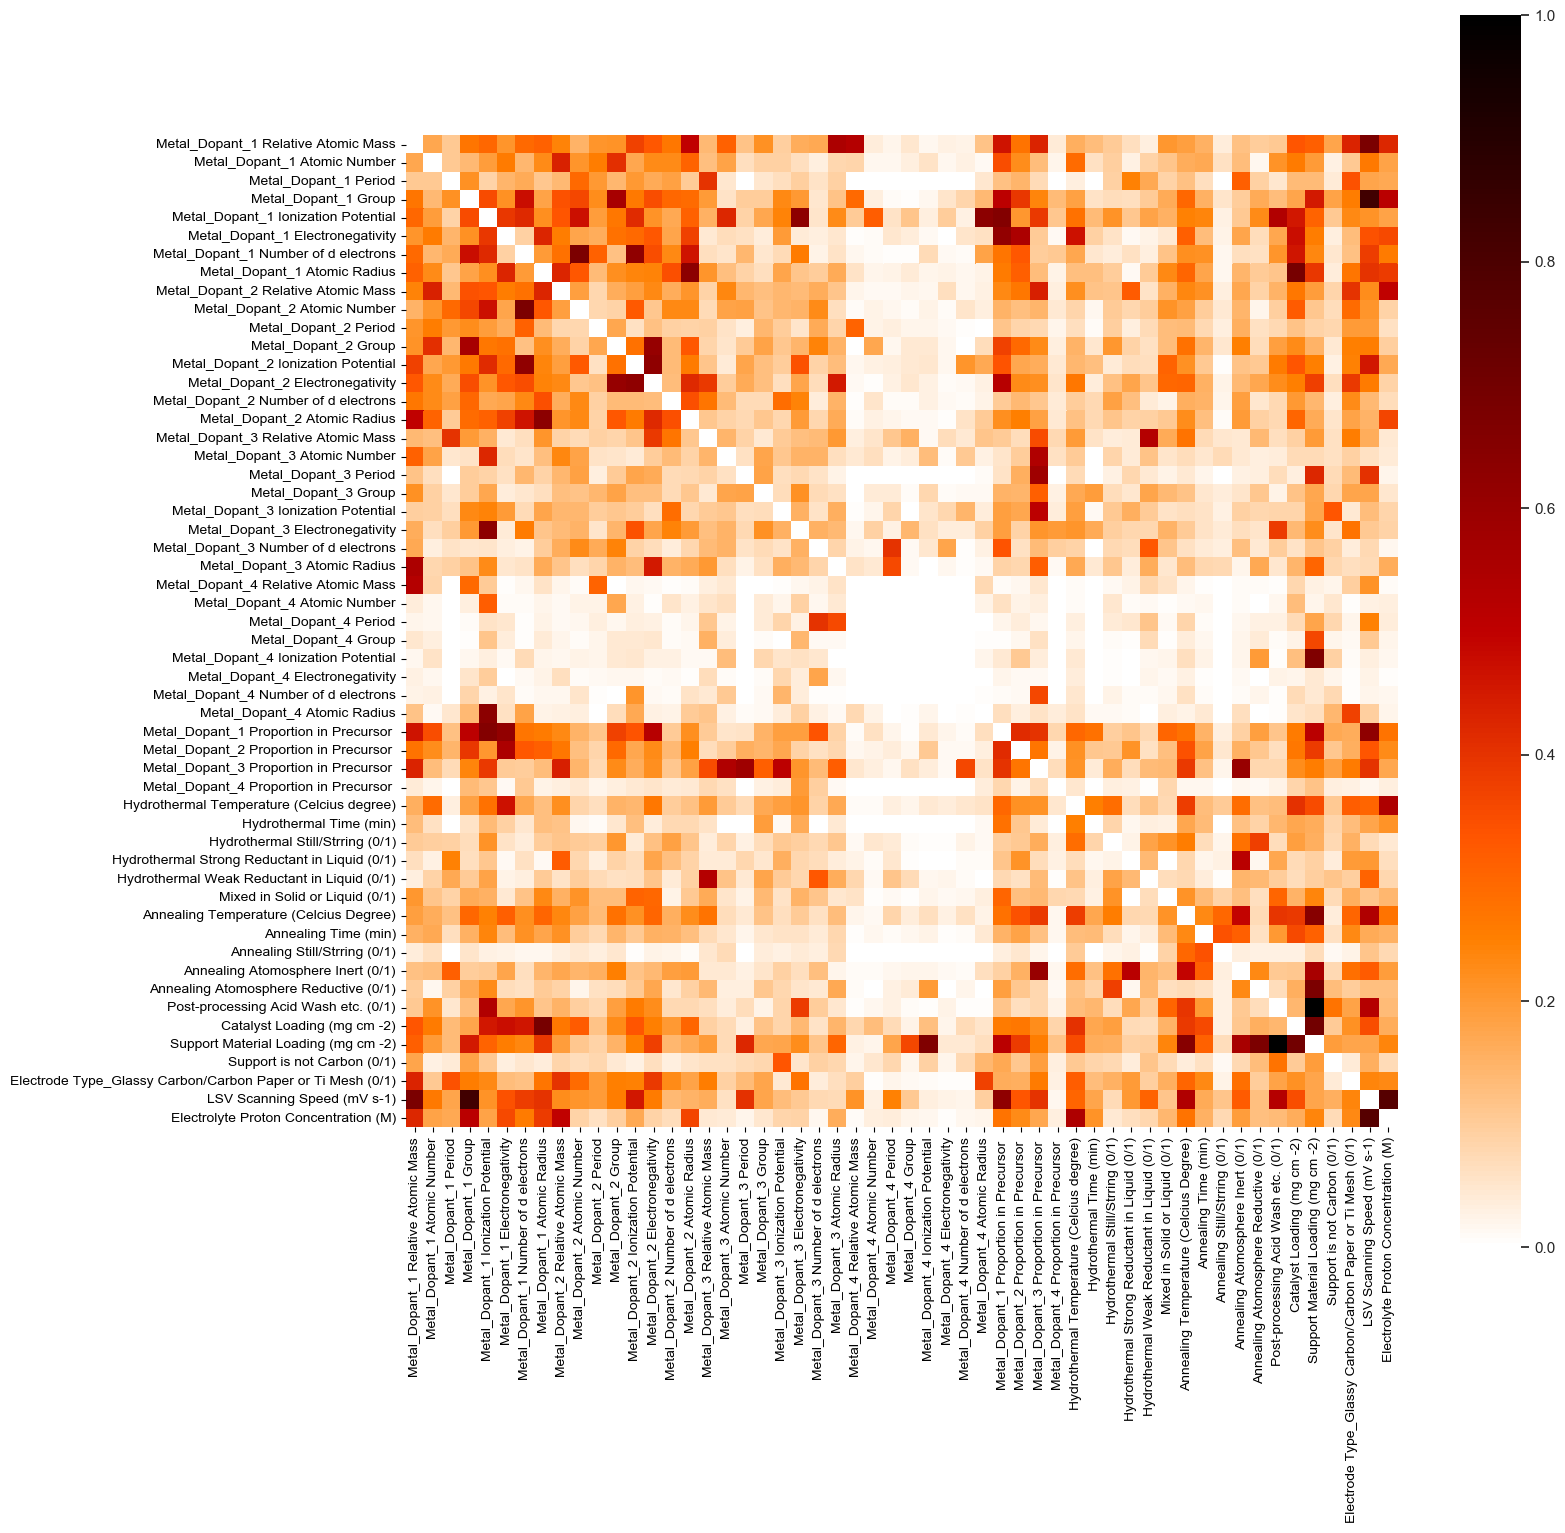

In [13]:
import seaborn as sns

f, ax= plt.subplots(figsize = (16, 16))
sns.set(font_scale=1)
ax=sns.heatmap(Weighted_Matrix,annot=False, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap="gist_heat_r")

In [14]:
Element_M=Weighted_Matrix.iloc[0:36,0:36]
Synthesis_M=Weighted_Matrix.iloc[36:55,36:55]

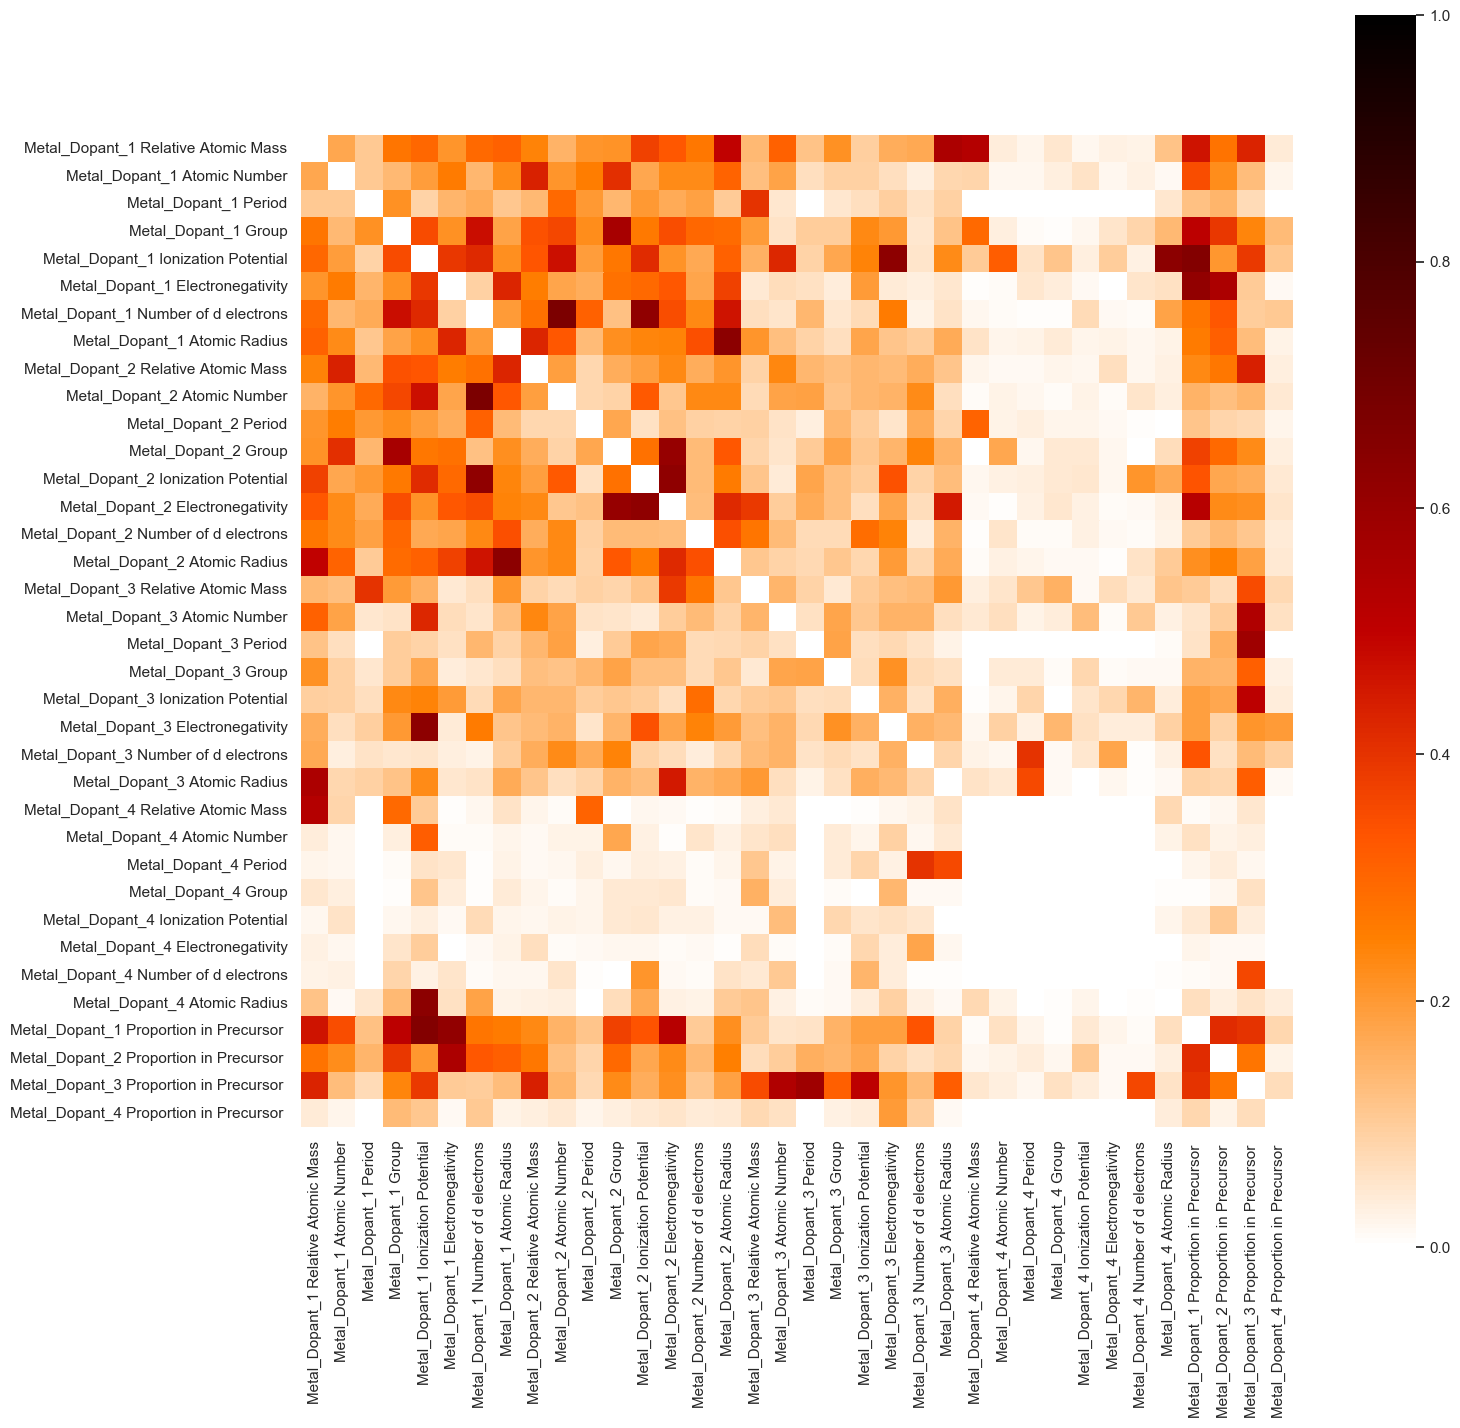

In [15]:
f1, ax1= plt.subplots(figsize = (16, 16))
# sns.set(font_scale=2)
ax1=sns.heatmap(Element_M,annot=False, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap="gist_heat_r")

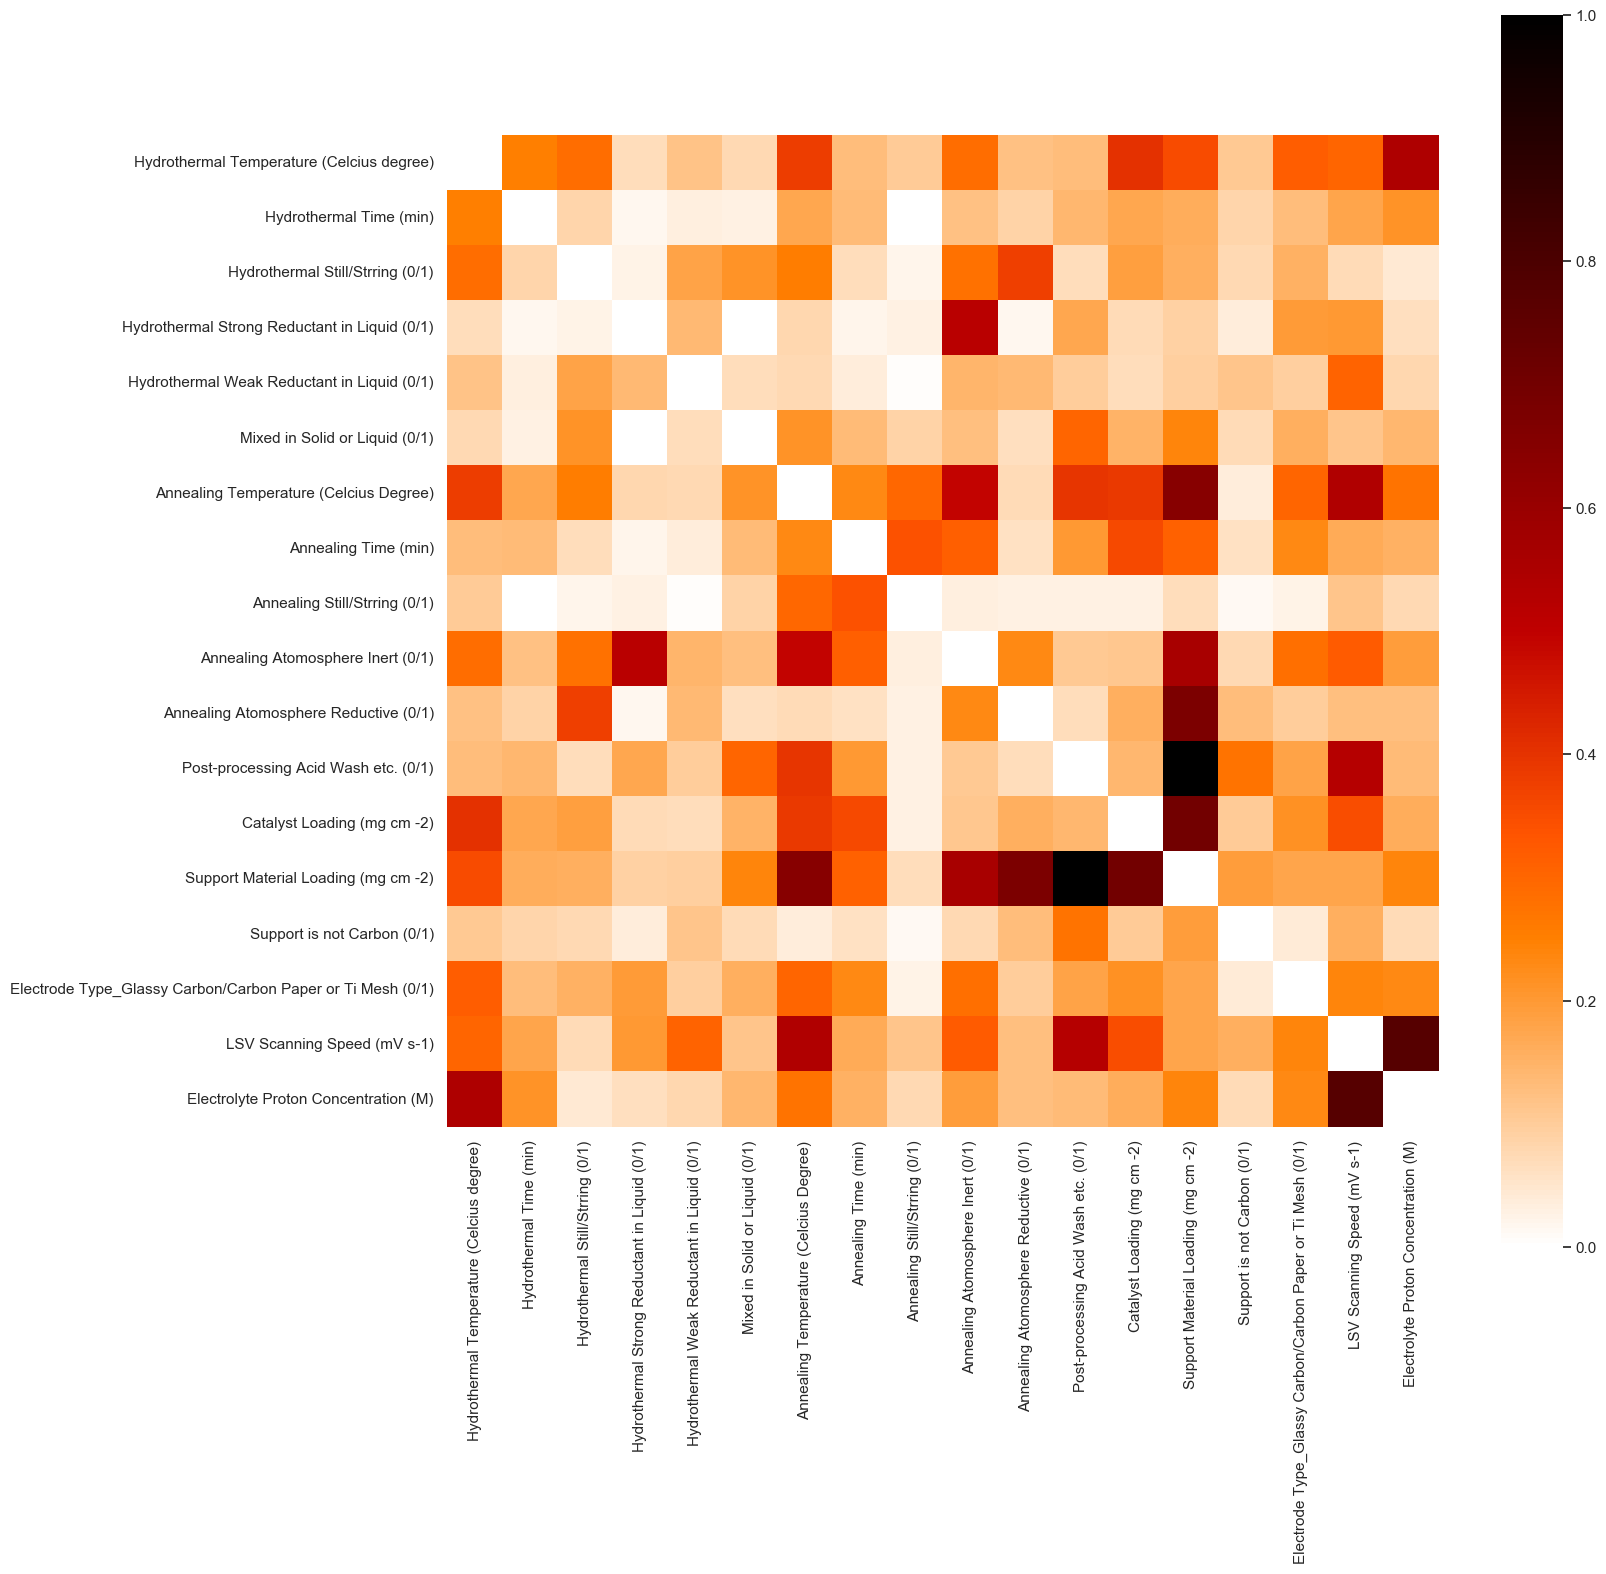

In [16]:
f2, ax2= plt.subplots(figsize = (16, 16))
# sns.set(font_scale=2)
ax2=sns.heatmap(Synthesis_M,annot=False, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap="gist_heat_r")